In [ ]:
import time
import datetime
import requests
import json
from bs4 import BeautifulSoup
import csv

URL = "https://www.ptt.cc"
MAX_PUSH = 70
TOPIC = "Stock" 

def get_resource(url):
    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko)"
               "Chrome/63.0.3239.132 Safari/537.36"}
    return requests.get(url, headers=headers, cookies={"over18":"1"})

def parse_html(r):
    if r.status_code == requests.codes.ok:
        r.encoding = "utf8"
        soup = BeautifulSoup(r.text, "html.parser")        
    else:
        print("HTTP請求錯誤..." + url)
        soup = None
    return soup    

def get_articles(soup, date):
    articles = []  
    paging_div = soup.find("div", class_="btn-group btn-group-paging")
    paging_a = paging_div.find_all("a", class_="btn")
    prev_url = paging_a[1]["href"]

    tag_divs = soup.find_all("div", class_="r-ent")
    for tag in tag_divs:
        if tag.find("div",class_="date").text.strip() == date:
            push_count = 0   
            push_str = tag.find("div", class_="nrec").text
            if push_str:
                try:
                    push_count = int(push_str)  
                except ValueError:  
                    if push_str == '爆':
                        push_count = 99
                    elif push_str.startswith('X'):
                        push_count = -10
            
            if tag.find("a"):  
                href = tag.find("a")["href"]
                title = tag.find("a").text
                articles.append({
                    "title": title,
                    "href": href,
                    "push_count": push_count,
                })
    
    return articles, prev_url

def web_scraping_bot(url):
    articles = []
    print("抓取網路資料中...")
    soup = parse_html(get_resource(url))
    if soup:
        for i in range(0,31):
            today =(datetime.datetime.now()+datetime.timedelta(days=-i)).strftime("%m-%d").lstrip('0')
            today=today.replace("-","/")
            current_articles, prev_url = get_articles(soup, today)
            while current_articles: 
                articles += current_articles
                
                time.sleep(0.0001) 
                soup = parse_html(get_resource(URL + prev_url))
                current_articles, prev_url = get_articles(soup, today)
            
            for i in today:
                print(i,end='')
            print("等待0.0003秒鐘...")

    return articles

url = URL + "/bbs/" + TOPIC + "/index.html"   
articles = web_scraping_bot(url)
LIST=[]
threshold = MAX_PUSH

import re
for item in articles:   
    if int(item["push_count"]) > threshold:
      parse_url = URL+item["href"]
      r = requests.get(parse_url, cookies = {"over18":"1"})
      soup = BeautifulSoup(r.text, "html.parser")
      ALL=soup.find(id="main-container").text
      PRE=ALL.split("--")[0]
      texts=PRE.split("\n")
      cons=texts[2:]
      content='\n'.join(cons)
      SS=[item["title"],(content)]
      LIST.append(SS)
dictList=dict(LIST)
print(dictList)


抓取網路資料中...
5/10等待0.0003秒鐘...
5/09等待0.0003秒鐘...
5/08等待0.0003秒鐘...
5/07等待0.0003秒鐘...
5/06等待0.0003秒鐘...
5/05等待0.0003秒鐘...
5/04等待0.0003秒鐘...
5/03等待0.0003秒鐘...
5/02等待0.0003秒鐘...
5/01等待0.0003秒鐘...
4/30等待0.0003秒鐘...
4/29等待0.0003秒鐘...
4/28等待0.0003秒鐘...
4/27等待0.0003秒鐘...
4/26等待0.0003秒鐘...
4/25等待0.0003秒鐘...
4/24等待0.0003秒鐘...
4/23等待0.0003秒鐘...
4/22等待0.0003秒鐘...
4/21等待0.0003秒鐘...
4/20等待0.0003秒鐘...
4/19等待0.0003秒鐘...
4/18等待0.0003秒鐘...
4/17等待0.0003秒鐘...
4/16等待0.0003秒鐘...
4/15等待0.0003秒鐘...
4/14等待0.0003秒鐘...
4/13等待0.0003秒鐘...
4/12等待0.0003秒鐘...
4/11等待0.0003秒鐘...
4/10等待0.0003秒鐘...
{'[閒聊] 2021/05/10 盤後閒聊 ': '台  股 17235.61  ▼49.39 (0.29%)  4902.15億\n台指05 17228     ▼55    (0.32%)  125,075口\n櫃買指   201.93  ▼2.46  (1.20%)   628.30億\n\n台指期 自營商   +732 投信   -11 外資 -1490\n台指選 自營商 -14527 投信  外資  -714\n漲停家數(+10%) 54\n跌停家數(-10%)  0\n成交量排行 中鋼、群創、陽明、長榮、友達\n成交值排行 陽明、長榮、中鋼、聯發科、群創\n', '[情報] 友達 4月營收 296億': 'https://mops.twse.com.tw/mops/web/t51sb10\n\n本資料由\u3000(上市公司) 友達\u3000公司提供\n\n     民國110年04月   單位：新台幣仟元\n\n項目        

**股票名稱 dictionary (尚未手動增加，但下一位可以用目前有的開始接續下去了)**

In [ ]:
import requests, lxml
import csv
from bs4 import BeautifulSoup
def get_resource(url):
    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko)"
               "Chrome/63.0.3239.132 Safari/537.36"}
    return requests.get(url, headers=headers, cookies={"over18":"1"})
def parse_html(r):
    if r.status_code == requests.codes.ok:
        r.encoding = "Big5-HKSCS"
        soup = BeautifulSoup(r.text, "lxml")        
    else:
        print("HTTP請求錯誤..." + url)
        soup = None
    
    return soup
def get_articles(soup):
    articles = []
    contents = []  
    tag_a = soup.find_all("a", class_='none')
    return tag_a
def web_scraping_bot(url):
    articles = []
    
    soup = parse_html(get_resource(url))
    if soup:
        tag_td = get_articles(soup)
        for tag in tag_td:
          articles.append(tag.text.strip())
        
    return articles

if __name__ == '__main__':
    all_articles = []
    dictionary ={}
    
    genera = ["水泥","食品","塑膠","紡織","電機","電器電纜","化學","生技醫療","玻璃","造紙","鋼鐵","橡膠","汽車","半導體","電腦週邊","光電",
              "通信網路","電子零組件","電子通路","資訊服務","其它電子","營建","航運","觀光","金融","貿易百貨","油電燃氣","存託憑證","ETF","ETN","其他"]
    
    print("抓取網路資料中...")
    for g in genera:
      url = "https://tw.stock.yahoo.com/h/kimosel.php?tse=1&cat="+ g +"&form=menu&form_id=stock_id&form_name=stock_name&domain=0"
      articles = web_scraping_bot(url)
      print ("抓取", g, "股資料")
      all_articles+=articles
    for i in all_articles:
      name_code = i.split()
      dictionary[name_code[0]]=name_code[1]
      for code, name in dictionary.items():
        dictionary[code]=name.replace("-KY","")
    code_add = ["6706", "8104", "8105", "8215"]
    name_add = ["惠特", "錸寶", "凌巨", "明碁材"]
    del dictionary['s']
    for i in range(0,len(code_add)):
      dictionary[code_add[i]] = name_add[i]

抓取網路資料中...
抓取 水泥 股資料
抓取 食品 股資料
抓取 塑膠 股資料
抓取 紡織 股資料
抓取 電機 股資料
抓取 電器電纜 股資料
抓取 化學 股資料
抓取 生技醫療 股資料
抓取 玻璃 股資料
抓取 造紙 股資料
抓取 鋼鐵 股資料
抓取 橡膠 股資料
抓取 汽車 股資料
抓取 半導體 股資料
抓取 電腦週邊 股資料
抓取 光電 股資料
抓取 通信網路 股資料
抓取 電子零組件 股資料
抓取 電子通路 股資料
抓取 資訊服務 股資料
抓取 其它電子 股資料
抓取 營建 股資料
抓取 航運 股資料
抓取 觀光 股資料
抓取 金融 股資料
抓取 貿易百貨 股資料
抓取 油電燃氣 股資料
抓取 存託憑證 股資料
抓取 ETF 股資料
抓取 ETN 股資料
抓取 其他 股資料


**股票出現次數**：stock_count

In [ ]:
content = dictList
stock = dictionary

#把dict的key, value合併成list
content_list = []
for x1, y1 in content.items():
    a = x1 + y1
    content_list.append(a)

#計算各股票個數
stock_count = {}
for x, y in stock.items():
    stock_count[x, y] = 0
    for i in range(0, len(content_list)):
        content_count1 = content_list[i].count(x)
        content_count2 = content_list[i].count(y)
        count = content_count1 + content_count2
        stock_count[x, y] += count

#股票出現次數排序
count = sorted(stock_count.items(), key=lambda x:x[1],reverse=True)
stock_count = dict(count)



**以股票中文計算個數**

In [ ]:
stock_name = []
stock = stock_count.keys()
for i in stock:
  name = i[1]
  stock_name.append(name)

stock_number = list(stock_count.values())
stock = dict(zip(stock_name, stock_number))


In [ ]:
rank_count = {}
rank = 1
i = 0

for key, value in count:
  if i == 3:
    break
  rank_count[key] = value
  i+=1

for name in rank_count:
  print ("第", rank, "名: ", name, "提及了", rank_count[name], "次")
  rank+=1
stockNo = []
for code,name in rank_count.keys():
  stockNo.append(code)
  

第 1 名:  ('2330', '台積電') 提及了 347 次
第 2 名:  ('2603', '長榮') 提及了 329 次
第 3 名:  ('2609', '陽明') 提及了 235 次


**計算抓取股票的日期**

In [ ]:
date = []
for i in range(0,63):
  today =(datetime.datetime.now()+datetime.timedelta(days=-i)).strftime("%Y-%m-%d").replace("-","")
  d = (datetime.datetime.now()+datetime.timedelta(days=-i)).strftime("%d").replace("-","")
  if d == "01":
    date.append(today)
date = sorted(date)

  


**畫成文字雲** 上傳'NotoSansCJKtc-Medium.otf'中文字體

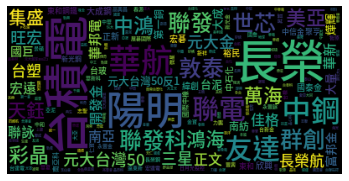

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
'''
from google.colab import files
print("請上傳'NotoSansCJKtc-Medium.otf'中文字體")
uploaded = files.upload()
'''
#將stock_name乘以stock_number製作成list
wordcloud = []
for x, y in stock.items():
    for i in range(0, y):
        wordcloud.append(x)

#將list轉換成str
wordcloud = ' '.join(wordcloud)
font_path = 'NotoSansCJKtc-Medium.otf'

#python用以下四行
'''
wd = WordCloud(font_path=font_path,collocations=False)
wd.generate(wordcloud)
imageCloud = wd.to_image()
imageCloud.show()
'''

#colab用以下五行
wc = WordCloud(background_color='black',collocations=False,font_path=font_path)
wc.generate(wordcloud)
plt.imshow(wc)
plt.axis("off")
plt.show()

date: ['20210401', '20210501']
20210401 2330
<Response [200]>
time.sleep 0.5 sec
closing_price_values: ['OK', '20210401', '110年04月 2330 台積電           各日成交資訊', ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], [['110/04/01', '45,972,766', '27,520,742,963', '598.00', '602.00', '594.00', '602.00', '+15.00', '48,170'], ['110/04/06', '37,664,216', '23,045,132,094', '615.00', '616.00', '608.00', '610.00', '+8.00', '42,422'], ['110/04/07', '28,140,964', '17,175,949,080', '614.00', '614.00', '608.00', '610.00', ' 0.00', '28,395'], ['110/04/08', '26,658,283', '16,217,570,357', '606.00', '613.00', '603.00', '613.00', '+3.00', '32,098'], ['110/04/09', '31,601,619', '19,344,167,081', '618.00', '618.00', '609.00', '610.00', '-3.00', '28,920'], ['110/04/12', '23,319,822', '14,155,495,430', '612.00', '613.00', '603.00', '605.00', '-5.00', '33,422'], ['110/04/13', '27,386,926', '16,638,680,378', '604.00', '613.00', '604.00', '605.00', ' 0.00', '30,438'], ['110/04/14', '31,144,922', '

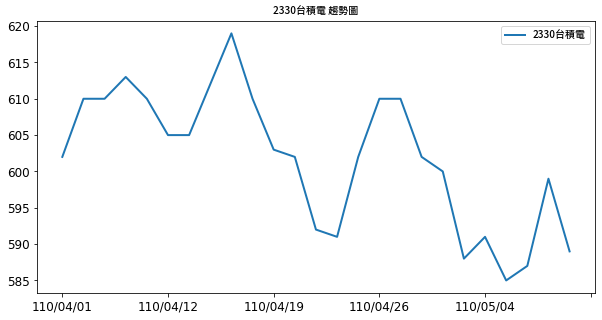

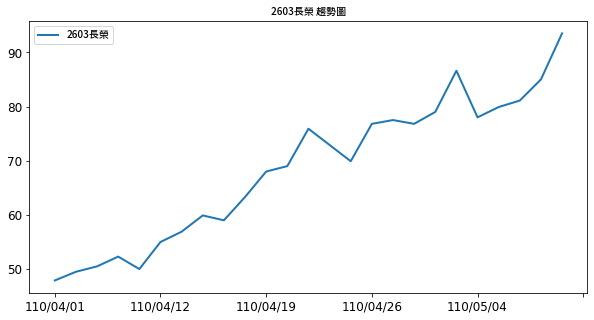

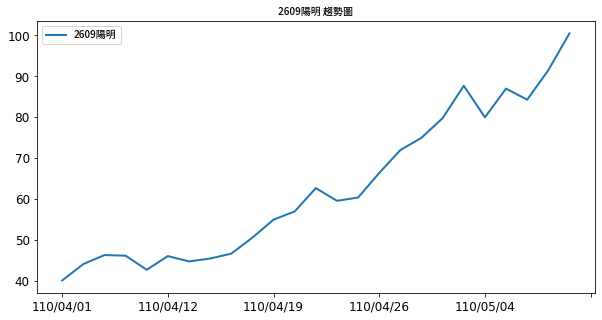

In [ ]:

#抓公開資訊網的資料

import os
import requests
import time
import requests
import json
import csv
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties

#做圖的參數設定
plt.rcParams['axes.unicode_minus'] = False #負數可正常顯示
font_path =  FontProperties(fname='NotoSansCJKtc-Medium.otf')


df = pd.DataFrame() 
for a in range(len(stockNo)) :
  closing_price_price=[]
  closing_price_date=[]
  print('date:',date)
  for d in range(len(date)) :
      url="https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ date[d] +"&stockNo="+ stockNo[a] 
      print(date[d],stockNo[a])
      try :
        res=requests.get(url)
        print(res)
      except Exception :
          if d >= len(date)-1 :
            do_some_log(e)
            print(e)
          else :
            time.sleep(1)
            print("time.sleep 1 sec")
            pass
      else :
        time.sleep(0.5)
        print("time.sleep 0.5 sec")
      s=json.loads(res.text,encoding='utf8') 
      closing_price_values=list(s.values())
      print('closing_price_values:',closing_price_values) 
      #日期跟收盤價的dataframe
      if(len(closing_price_values) > 1):
        for i in range(len(closing_price_values[4])):
          closing_price_price.append(float(closing_price_values[4][i][6]))
          closing_price_date.append(closing_price_values[4][i][0])
          i +=1 
        #公司名
        stock = closing_price_values[2].split(' ',3)  
        title = stock[1]+stock[2] #1是代碼、2是公司名
        d += 1    
        df = pd.DataFrame(data = closing_price_price,index = closing_price_date, columns= [title])
  #做圖      
  #取當天到前30天 
  df[-30:].plot(figsize = (10, 5),
          fontsize = 12,
          title = title  + "\t趨勢圖",
          linewidth = 2.0) 
  plt.title(title + "\t趨勢圖" ,fontproperties=font_path)
  plt.legend(prop=font_path)
  a += 1
plt.show() 

